# Detecting the coin in image using OpenCV in 3 diffrenet ways.


## 1- Threshold   

## 2- Canny Edge Detection 

## 3- Hough Circles

# Steps:
    
    1- Read your image and convert it to Gray scale
        
    2- Thresholding the Blur image and  Segmentation 
    
    3- Find Contours
    
    4- Draw Contours

# 1- Threshold   

# Step 1  ( Read your image and convert it to Gray scale ) :

In [1]:
# import libraries 
import cv2
import numpy as np
from matplotlib import pyplot as plt

###### cv2.imread(path, flag)

flag (defult) = cv2.IMREAD_COLOR

flag types = (cv2.IMREAD_COLOR)=1 ,(cv2.IMREAD_GRAYSCALE)=0 or (cv2.IMREAD_UNCHANGED)=-1


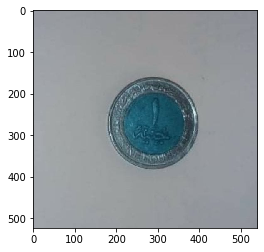

In [2]:
# read and show the image
img = cv2.imread ("6.jpg")
#show the image
plt.imshow(img)

In [3]:
print("img.shape => ",img.shape)
print("img.dtype => ",img.dtype)
print("_____________________________________________")

img.shape =>  (524, 540, 3)
img.dtype =>  uint8
_____________________________________________


###### cv2.cvtColor => to change the color to img

cv2.cvtColor(src, flag) 

flag = (cv2.COLOR_BGR2HSV) or (cv2.COLOR_BGR2GRAY)

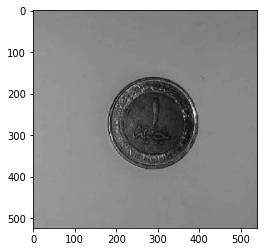

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray,"gray")

In [5]:
print("gray.shape => ",gray.shape)
print("gray.dtype => ",gray.dtype)
print("_____________________________________________")

gray.shape =>  (524, 540)
gray.dtype =>  uint8
_____________________________________________


# Step 2 ( Thresholding  ):

###### cv2.threshold(img,threshold,max_value,THRESH_type)

In [6]:
high_thresh, thresh_im = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

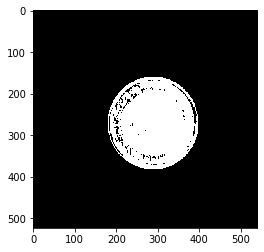

In [7]:
plt.imshow(thresh_im,"gray")

# Step 4 (Find Contours):

### cv.FindContours(image, mode, method)

Contour Retrieval Mode: 4

1- RETR_LIST

2- RETR_EXTERNAL

3- RETR_TREE

4- RETR_CCOMP

 - I have select ( mode = cv2.RETR_LIST ) becouse it retrieves all the contours
    
 - OR I can also use (mode = cv2.RETR_EXTERNAL ) becouse it returns only extreme outer flags
 
Contour Approximation Methods:

 1- CHAIN_APPROX_NONE
 
 2- CHAIN_APPROX_SIMPLE 
 
  - I have select ( method = cv2.CHAIN_APPROX_NONE ) to display all points



In [8]:
contours, hierarchy = cv2.findContours(thresh_im, cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [9]:
print ("Contours in the image, %d" % (len(contours)))
print("hierarchy shape= ", hierarchy.shape)

Contours in the image, 153
hierarchy shape=  (1, 153, 4)


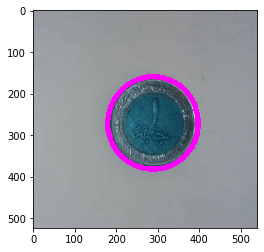

In [10]:
c = max(contours, key = cv2.contourArea)
#cv2.drawContours(img,contours,num of contours,color, thinknes)

cv2.drawContours(img,[c],0, (255, 0, 255), 12)

plt.imshow( img)

# -----------------------------------------------------------------------------------------------------

# 2- Canny Edge Detection 

#  Steps:
    
    1- Read your image and convert it to Gray scale
    
    2- Smoothing with (GaussianBlue)
   
    3- Thresholding and detect edge 
    
    4- Find Contours
    
    5- Draw Contours

# Step 1  ( Read your image and convert it to Gray scale):

In [11]:
# import libraries 
import cv2
import numpy as np
from matplotlib import pyplot as plt

###### cv2.imread(path, flag)
flag (defult) = cv2.IMREAD_COLOR

flag types = (cv2.IMREAD_COLOR)=1 ,(cv2.IMREAD_GRAYSCALE)=0 or (cv2.IMREAD_UNCHANGED)=-1

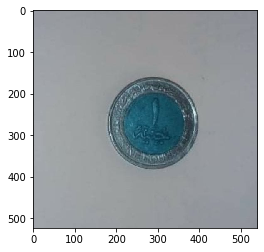

In [12]:
# read and show the image
img2 = cv2.imread ("6.jpg")
#show the image
plt.imshow(img2)

In [13]:
print("img.shape => ",img2.shape)
print("img.dtype => ",img2.dtype)
print("_____________________________________________")

img.shape =>  (524, 540, 3)
img.dtype =>  uint8
_____________________________________________


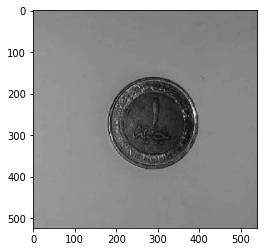

In [14]:
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

plt.imshow(gray2,"gray")

# Step 2  (Smoothing with (GaussianBlue)) :

###### cv.GaussianBlur(src, ksize, sigmaX[,sigmaY[,borderType=BORDER_DEFAULT)

src = image

ksize = kernal size 

sigmax=Kernel standard deviation along X-axis (horizontal direction).

sigmay=Kernel standard deviation along Y-axis (vertical direction).

If sigmaY=0, then sigmaX value is taken for sigmaY



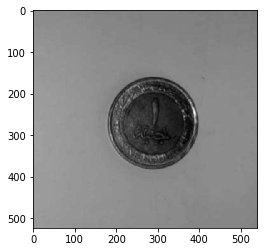

In [15]:
Blur = cv2.GaussianBlur(gray2, ksize=(5,5),sigmaX=0)
plt.imshow(Blur,"gray")


In [16]:
print("Blur.shape => ",Blur.shape)
print("Blur.dtype => ",Blur.dtype)
print("_____________________________________________")

Blur.shape =>  (524, 540)
Blur.dtype =>  uint8
_____________________________________________


# Step 3 ( Thresholding ):

###### cv2.threshold(img,threshold,max_value,THRESH_type)

In [17]:
high_thresh2, thresh_im2 = cv2.threshold(Blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

low_thresh2 = 0.5*high_thresh2

print("high_thresh = ", high_thresh2)
print("_____________________________________________")
print("low_thresh = ", low_thresh2)
print("_____________________________________________")
print("thresh_im = \n", thresh_im2)
print("_____________________________________________")
print("thresh_im.shape = \n", thresh_im2.shape)
print("_____________________________________________")

high_thresh =  121.0
_____________________________________________
low_thresh =  60.5
_____________________________________________
thresh_im = 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
_____________________________________________
thresh_im.shape = 
 (524, 540)
_____________________________________________


In [18]:
#Another way to calculate high and low threshold
sigma=0.5
v = np.median(Blur)

lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
print("lower",lower)
print("upper",upper)

lower 77
upper 231


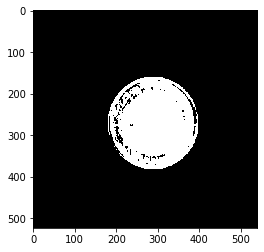

In [19]:
plt.imshow(thresh_im2,"gray")

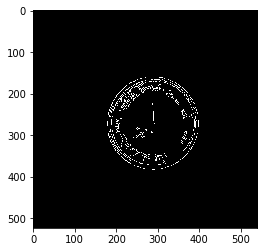

In [20]:
#cv2.canny(image, lower threshold, upper threshold)
canny = cv2.Canny(Blur, low_thresh2, high_thresh2)

plt.imshow( canny,"gray")


# Step 4 (Find Contours):

#### cv.FindContours(image, mode, method)

Contour Retrieval Mode: 4

1- RETR_LIST

2- RETR_EXTERNAL

3- RETR_TREE

4- RETR_CCOMP
    
 - I have select (mode = cv2.RETR_EXTERNAL ) becouse it returns only extreme outer flags
 
Contour Approximation Methods:

 1- CHAIN_APPROX_NONE
 
 2- CHAIN_APPROX_SIMPLE 
 
  - I have select ( method = cv2.CHAIN_APPROX_NONE ) to display all points



In [21]:
contours2, hierarchy2 = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print ("Contours in the image, %d" % (len(contours2)))
print("hierarchy2 = ", hierarchy2)

Contours in the image, 1
hierarchy2 =  [[[-1 -1 -1 -1]]]


#  Step 5 ( Draw Contours ):

cv2.drawContours(img,contours,num_of_contours,color, thinknes)

num_of_contours = -1 ( to display all contours)

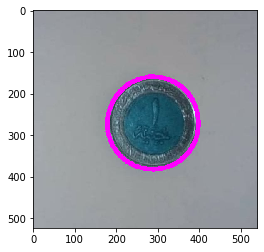

In [22]:
cv2.drawContours(img2, contours2, -1, (255, 0, 255), 9)

plt.imshow( img2)

# ------------------------------------------------------------------------------------------------


# 3- Hough Circles

# Steps:

    
    1- Read your image and convert it to Gray scale
    
    2- Smoothing with (GaussianBlue)
   
    3- Thresholding
    
    4- Detect Circles
    
    5- Draw Circle

#  Step 1  ( Read your image and convert it to Gray scale):

In [23]:
# import libraries 
import cv2
import numpy as np
from matplotlib import pyplot as plt

###### cv2.imread(path, flag)
flag (defult) = cv2.IMREAD_COLOR

flag types = (cv2.IMREAD_COLOR)=1 ,(cv2.IMREAD_GRAYSCALE)=0 or (cv2.IMREAD_UNCHANGED)=-1

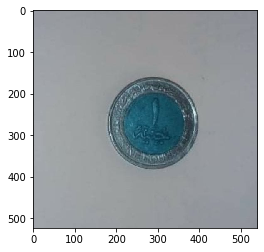

In [24]:
# read and show the image
img3 = cv2.imread ("6.jpg")
#show the image
plt.imshow(img3)

In [25]:
print("img.shape => ",img3.shape)
print("img.dtype => ",img3.dtype)
print("_____________________________________________")

img.shape =>  (524, 540, 3)
img.dtype =>  uint8
_____________________________________________


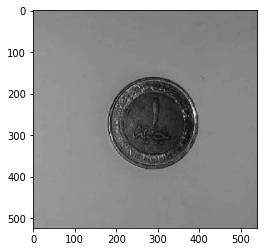

In [26]:
gray3=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

plt.imshow(gray3,"gray")

# Step 2  (Smoothing with (GaussianBlue)) :

###### cv.GaussianBlur(src, ksize, sigmaX[,sigmaY[,borderType=BORDER_DEFAULT)

src = image

ksize = kernal size 

sigmax=Kernel standard deviation along X-axis (horizontal direction).

sigmay=Kernel standard deviation along Y-axis (vertical direction).

If sigmaY=0, then sigmaX value is taken for sigmaY


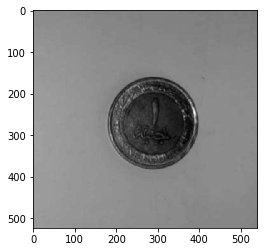

In [27]:
Blur2 = cv2.GaussianBlur(gray3, ksize=(5,5),sigmaX=0)
plt.imshow(Blur2,"gray")


In [28]:
print("Blur.shape => ",Blur2.shape)
print("Blur.dtype => ",Blur2.dtype)
print("_____________________________________________")

Blur.shape =>  (524, 540)
Blur.dtype =>  uint8
_____________________________________________


# Step 3 ( Thresholding ):

###### cv2.threshold(img,threshold,max_value,THRESH_type)

In [29]:
high_thresh3, thresh_im3 = cv2.threshold(Blur2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

low_thresh3 = 0.5*high_thresh3

print("high_thresh = ", high_thresh3)
print("_____________________________________________")
print("low_thresh = ", low_thresh3)
print("_____________________________________________")
print("thresh_im = \n", thresh_im3)
print("_____________________________________________")
print("thresh_im.shape = \n", thresh_im3.shape)
print("_____________________________________________")

high_thresh =  121.0
_____________________________________________
low_thresh =  60.5
_____________________________________________
thresh_im = 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
_____________________________________________
thresh_im.shape = 
 (524, 540)
_____________________________________________


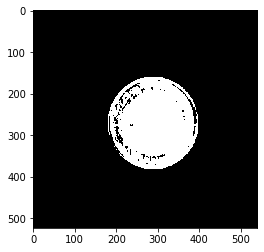

In [30]:
plt.imshow(thresh_im3,"gray")

# Step 4  (  Detect Circles ):

###### cv2.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) 

param1 = the higher threshold

param2 = the lower threshold

In [31]:
minDist =19 # to detect the largest circle
dp=1 # the accumulator has the same resolution as the input image
#If dp=2 , the accumulator has half as big width and height.
param1 = high_thresh3
param2 = low_thresh3
circles = cv2.HoughCircles(Blur2,cv2.HOUGH_GRADIENT,dp,minDist,param1,param2)

          
print (circles)
print(circles.shape)
print("I have  found "+str(circles.shape[1])+" circle")
#circles output = x,y,r

[[[287.5 267.5 107.4]]]
(1, 1, 3)
I have  found 1 circle


Accroding to circles output:
    
    - the center_coordinates =(287.5,267.5)
    
    - thr radious of the circle = 107.4

# Step 5 ( Draw Circles):

###### cv2.circle(image, center_coordinates, radius, color, thickness)

In [32]:
for i in circles[0,:]:
    cv2.circle(img3,(i[0],i[1]),i[2],(255,0,0),7)


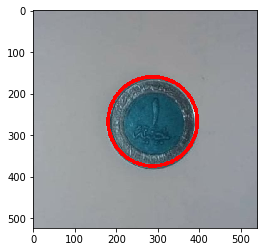

In [33]:
plt.imshow(img3)